* 0 upzip
* 1 file open
* 2 img_tmp 에 img값을 담는다.
* 3 spilt으로 나눠서 list 원소 5개 담김
* 4 border에 정보를 담는다.
* 5 img_tmp를 크롭한다.
* 6 line이 없을 때까지 2~5 반복


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls
!unzip drive/MyDrive/yolov3/images.zip

drive  sample_data
Archive:  drive/MyDrive/yolov3/images.zip
  inflating: images/bori_01.jpg      
  inflating: images/bori_01.txt      
  inflating: images/bori_02.jpg      
  inflating: images/bori_02.txt      
  inflating: images/bori_03.jpg      
  inflating: images/bori_03.txt      
  inflating: images/bori_04.jpg      
  inflating: images/bori_04.txt      
  inflating: images/bori_05.jpg      
  inflating: images/bori_05.txt      
  inflating: images/bori_06.jpg      
  inflating: images/bori_06.txt      
  inflating: images/bori_07.jpg      
  inflating: images/bori_07.txt      
  inflating: images/bori_08.jpg      
  inflating: images/bori_08.txt      
  inflating: images/bori_09.jpg      
  inflating: images/bori_09.txt      
  inflating: images/bori_10.jpg      
  inflating: images/bori_10.txt      
  inflating: images/bori_11.jpg      
  inflating: images/bori_11.txt      
  inflating: images/bori_12.jpg      
  inflating: images/bori_12.txt      
  inflating: images/bori_13

In [ ]:
%cd images
!ls

/content/images
bori_01.jpg  bori_39.jpg  pony_15.jpg  pp_10.jpg       wangbal_18.jpg
bori_01.txt  bori_39.txt  pony_15.txt  pp_10.txt       wangbal_18.txt
bori_02.jpg  bori_40.jpg  pony_16.jpg  pp_11.jpg       wangbal_19.jpg
bori_02.txt  bori_40.txt  pony_16.txt  pp_11.txt       wangbal_19.txt
bori_03.jpg  bori_41.jpg  pony_17.jpg  pp_12.jpg       wangbal_20.jpg
bori_03.txt  bori_41.txt  pony_17.txt  pp_12.txt       wangbal_20.txt
bori_04.jpg  mi_01.jpg	  pony_18.jpg  pp_13.jpg       wangbal_22.jpg
bori_04.txt  mi_01.txt	  pony_18.txt  pp_13.txt       wangbal_22.txt
bori_05.jpg  mi_02.jpg	  pony_19.jpg  pp_14.jpg       wangbal_23.jpg
bori_05.txt  mi_02.txt	  pony_19.txt  pp_14.txt       wangbal_23.txt
bori_06.jpg  mi_03.jpg	  pony_20.jpg  pp_15.jpg       wangbal_24.jpg
bori_06.txt  mi_03.txt	  pony_20.txt  pp_15.txt       wangbal_24.txt
bori_07.jpg  mi_04.jpg	  pony_21.jpg  pp_16.jpg       wangbal_25.jpg
bori_07.txt  mi_04.txt	  pony_21.txt  pp_16.txt       wangbal_25.txt
bori_08.jpg 

2436
1125
['0 0.540444 0.761494 0.917333 0.477011\n']
['0', '0.540444', '0.761494', '0.917333', '0.477011']
[0.0, 0.540444, 0.761494, 0.917333, 0.477011]
(91.99968750000006, 1273.9999859999998, 1123.9993125, 2435.998782)
wangbal_61_crop_0.jpg


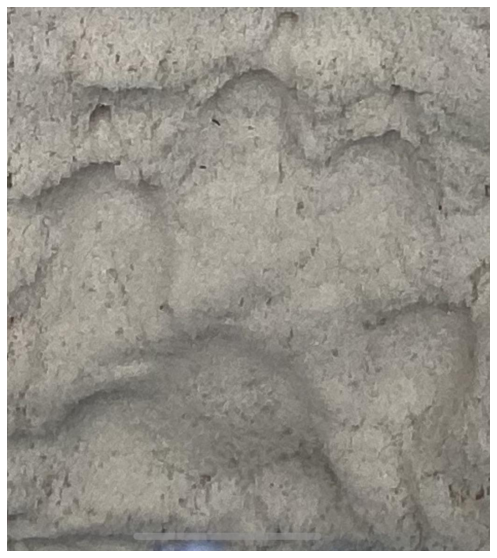

In [ ]:
 
#image와 text 파일 들어있는 dir 열기

from PIL import ImageOps 
from PIL import Image
import cv2

s = 'wangbal_61'

# 이미지 열기
img = Image.open(s+'.jpg')
im = cv2.imread(s+'.jpg')
h, w, c = im.shape
#imShow('bori_22.jpg')
print(h)
print(w)
infile = open(s+'.txt', 'r')
#h, w, c = im.shape
i = 0
#for ch in infile:
#img_tmp = img #\n 단위로 끊고 싶어
ch = infile.readlines() #object-id center_x center_y width height
#ch_sp = ch.split()
print(ch)
i=0
ch_sp=[]
for ch_sp_list in ch :
  img_tmp = img
  
  ch_sp_list=ch_sp_list.split()
  print(ch_sp_list)

  for ch_a in ch_sp_list :
    ch_a = float(ch_a)
    ch_sp.append(ch_a)
  
  print(ch_sp)
  border = (w*(ch_sp[1]-ch_sp[3]/2), h*(ch_sp[2]-ch_sp[4]/2), w*(ch_sp[1]+ch_sp[3]/2), h*(ch_sp[2]+ch_sp[4]/2))
  print(border)
  img_tmp = img_tmp.crop(border)
  img_name = (s+'_crop_{}.jpg').format(i)
  print(img_name)
  img_tmp.save(img_name)
  imShow(img_name)
  i = i+1
  ch_sp = []

#border = (ch_sp[1]-ch_sp[3]/2, ch_sp[2]-ch_sp[4]/2, ch_sp[1]+ch_sp[3]/2, ch_sp[2]+ch_sp[4]/2)
#ImageOps.crop(img_tmp, border)
#img_name = 'bori_20_crop_{}.jpg'.format(i)
#img_tmp.save(img_name)


infile.close()
 
#border = (0, 30, 0, 30) # left, up, right, bottom 

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

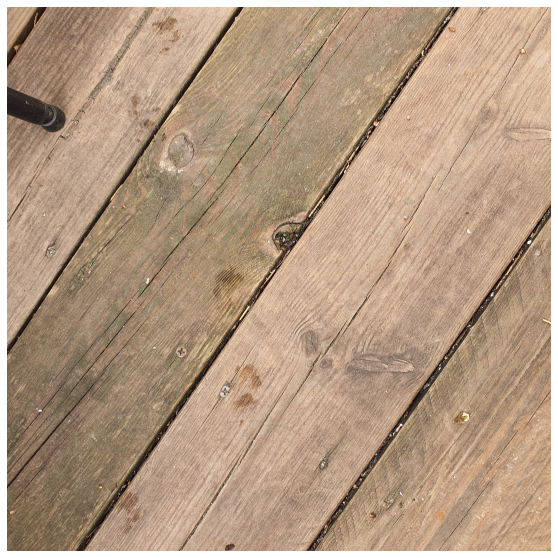

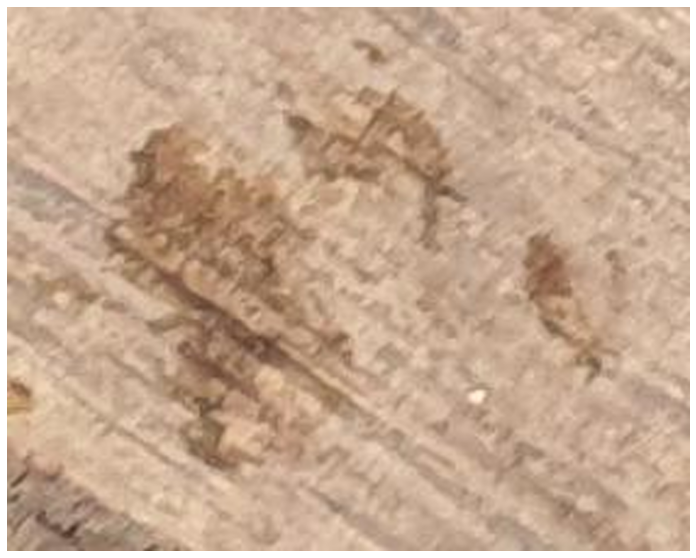

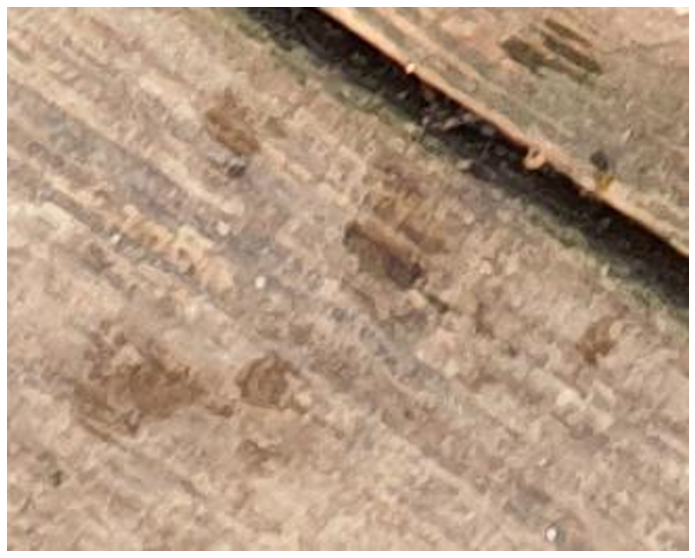

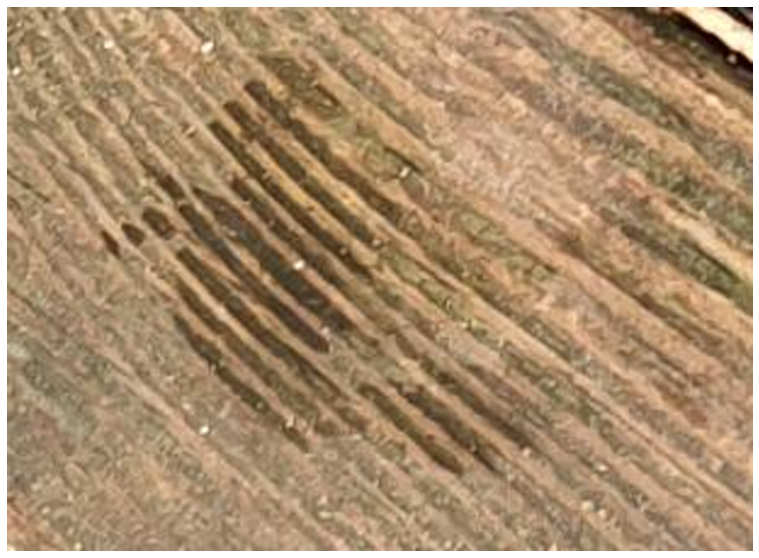

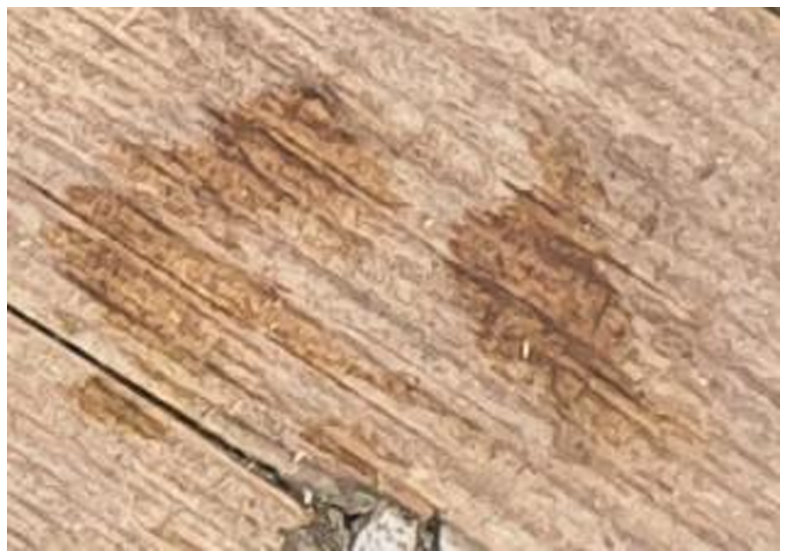

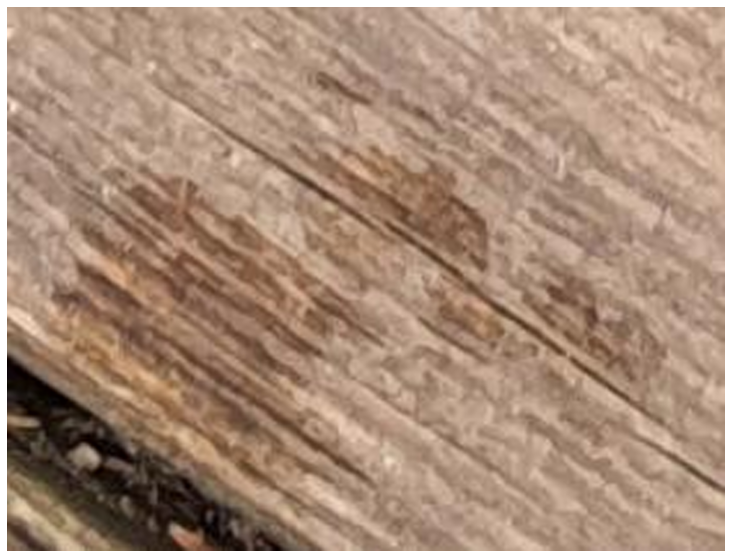

In [ ]:
imShow('bori_19.jpg')
imShow('bori_19_crop_0.jpg')
imShow('bori_19_crop_1.jpg')
imShow('bori_19_crop_2.jpg')
imShow('bori_19_crop_3.jpg')
imShow('bori_19_crop_4.jpg')
#imShow('bori_19_crop_5.jpg')

In [ ]:
!ls
#!cp /content/drive/MyDrive/yolov3/*.jpg /content/drive/MyDrive/yolov3/images/
!rm -rf /content/drive/MyDrive/yolov3/*.jpg

drive  images  sample_data
